In [1]:
import pandas as pd
import os

In [2]:
os.chdir(r'C:\Users\mathi\Documents\GitHub\data-labs\module-1\lab-data_cleaning\datafiniti-womens-shoe-prices')

In [874]:
df=pd.read_csv('Datafiniti_Womens_Shoes.csv')
df.head(5)


,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean,...,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,weight
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,NaN,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,"Silver,Cream Watercolor Floral",NaN,NaN,...,Overstock.com,NaN,NaN,NaN,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311,NaN
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Walmart.com,NaN,NaN,Standard,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Shoes,Shoes",Black,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903,NaN
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,Grey,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Walmart.com,NaN,NaN,Expedited,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045958,NaN


### Let's check for the missing values and place it in df_m1

In [4]:
df_m=df.isna().sum()
df_m1=df_m[df_m>0]
df_m1

asins                   9997
colors                  7369
dimension               9883
ean                     9329
manufacturer            9473
manufacturerNumber      7518
prices.availability     9566
prices.condition        9562
prices.dateAdded         777
prices.merchant         9565
prices.offer            9879
prices.returnPolicy    10000
prices.shipping         9588
upc                      360
weight                  9701
dtype: int64

### Decide the columns to drop : all the columns with more than 95% missing values

### BUT We decide to keep the prices.offer column cause NaN might mean no sales


In [5]:
df_m1 = df_m[df_m>0]/df.shape[0]
columns_to_drop=df_m1[df_m1>0.95].index
columns_to_drop=['asins', 'dimension', 'prices.availability', 'prices.condition',
       'prices.merchant', 'prices.returnPolicy',
       'prices.shipping', 'weight']

In [6]:
df=df.drop(columns_to_drop, axis=1)

### We print the rows where prices.isSale is True and prices.offer is null --> means that it's in sale but we don't have the discount value

### As it is 49 out of 10 000, we drop them

In [7]:
df.loc[df['prices.offer'].isnull()==False]
df[['prices.isSale','prices.offer']][(df['prices.isSale']==True) & (df['prices.offer'].isnull()==True)].sum()
rows_to_drop = df[['prices.isSale','prices.offer']][(df['prices.isSale']==True) & (df['prices.offer'].isnull()==True)]
df=df.drop(rows_to_drop.index)



### We replace the missing values with 0 considering the 'discount' is 0%
#### Then we drop the column prices.isSale cause it gives the same information but less precisly

In [8]:
df['prices.offer']=df['prices.offer'].fillna('0%')
df=df.drop('prices.isSale',axis=1)

### Let's check for the missing values left

In [9]:
df_m=df.isna().sum()
df_m1=df_m[df_m>0]
df_m1

colors                7369
ean                   9323
manufacturer          9457
manufacturerNumber    7518
prices.dateAdded       773
upc                    360
dtype: int64

### Now clean the primaryCategories column Shoes,Shoes becomes Shoes and now they all have the same value I drop it

In [10]:
df.primaryCategories.unique()
df.primaryCategories=df['primaryCategories'].str.replace('Shoes,Shoes','Shoes')

In [11]:
df=df.drop('primaryCategories',axis=1)

### The ean and upc represent the same thing, they are bar codes,
### We check the number of rows where the ean and the upc values are missing and it's the same as the upc missing values number so we drop the ean column

In [12]:
len(df[(df['ean'].isnull()==True) & (df['upc'].isnull()==True)])

360

In [13]:
df=df.drop('ean',axis=1)

### I also drop the men rows cause there are only 61 men shoes

In [14]:
women=0
for i in df['categories']:
    if 'Women'  in i:
        women+=1
women

9951

In [15]:
import re

df.categories.apply(lambda x: str(re.search(r'\b[M,m]en\b',x))!='None').sum()

61

In [16]:
import re
df1=df.drop(df.categories[df.categories.apply(lambda x: str(re.search(r'\b[M,m]en\b',x)))!='None'].index)

# Clean the categories column

In [17]:
all_categories_set=set([j for i in df1.categories.values.tolist() for j in i.strip(',').split(',')])
all_categories_set
good_categories_set=set([' Running & Yoga', 'Athletic', 'Athletic Shoes', 'Boat Shoes', 'Boots', "Boys' Shoes", 'Comfort',
                         'Cowboy Boots', 'Fitness', 'Flats', 'Heels', 'Home Improvement', 'Loafers', 'Low Slide Sandals',
                         'Mid-Calf Boots', 'Mules', 'Other Slip-Ons', 'Oxfords', 'Pumps', 'Rampage', 'Sandals',
                         'Sandals & Flip Flops', 'Slip-ons', 'Slippers', 'Sneakers', 'Sporting Goods', "Women's Athletic Shoes",
                         "Women's Boots", "Women's Casual Boots & Shoes", "Women's Casual Shoes", "Women's Clothing",
                         "Women's Dress Shoes", "Women's Footwear", "Women's New Balance Shoes", "Women's Red Wing Shoes",
                         "Women's Road Running Shoes", "Women's Running Shoes", "Women's Sandals", "Women's Shoes",
                         "Women's Slippers", "Women's Trail Running Shoes", "Women's Winter Boots",
                         "Women's Work & Safety Shoes", 'Womens Casual Shoes', 'Womens Comfort', 'Womens Comfort Boots & Booties',
                         'Womens Oxford & Loafers', 'Womens Oxfords', 'Womens Sandals & Flip Flops','Womens Sport Sandals',
                         'Work Safety Clothing and Equipment'])
bad_categories_set=all_categories_set-good_categories_set
bad_categories_set=set([' Shoes & Accessories','2 Lips Too','A2 by Aerosoles','ASICS',"All Women's Shoes",'All Womens Shoes',
                        'Andrew Geller','Apt. 9','Barrow','Betula by Birkenstock',"Candie's",'Clarks','Clogs','Clothing',
                        'Corkys','Croft','Dolce by Mojo Moxy',"Dr. Scholl's",'Eastland','Easy Street','FILA','Fergalicious',
                        'Forever Collectibles','Henry Ferrera','Herstar','Jennifer Lopez','Journee Collection','K-Swiss','Keds',
                        'Kisses by 2 Lips Too','Koolaburra by UGG','LC Lauren Conrad','Laredo','LifeStride','Lugz','MUK LUKS',
                        'NYLA','NaturalSoul by naturalizer','New Balance','Nike','Olivia Miller','PUMA','Qupid','REEF',
                        'Rocky 4EurSole','Ryka','SONOMA Goods for Life','Seven7','Shoes','Shop by Clothing Type',
                        'Simply Vera Vera Wang','Skechers','Soft Style by Hush Puppies','Spring Step',
                        'Style Charles by Charles David','Under Armour','Unionbay','Vans',"Women's",'Womens','Women',
                        'Womens Shoes','adidas','madden NYC','sugar'])
df2=df1.copy()
for i in bad_categories_set :
    df2['categories']=df2['categories'].str.replace(i,'')


In [18]:
df2['categories']=df2['categories'].str.replace("  ",' ')

In [19]:
df2['categories']=df2['categories'].str.replace(" ,",'')

In [20]:
df2['categories']=df2['categories'].str.replace("'s ",'')

In [21]:
df2['categories']=df2['categories'].str.replace("'s",'')

In [22]:
df2['categories']=df2['categories'].str.replace(" &",' ')

In [23]:
df2['categories']=df2['categories'].str.replace("All",'')

In [24]:
df2['categories']=df2['categories'].str.replace("Boys'",'Boyish')

In [25]:
df2['categories']=df2['categories'].str.replace("BoyishBoots",'Boyish,Boots')

In [26]:
df2['categories']=df2['categories'].str.replace("'",'')

In [27]:
df2['categories']=df2['categories'].str.replace("Casual Boots Casual ",'Casual,Boots')

In [28]:
df2['categories']=df2['categories'].str.replace("CasualCasual",'Casual')

In [29]:
df2['categories']=df2['categories'].str.replace("Casual Casual",'Casual')

In [30]:
df2['categories']=df2['categories'].str.replace("Casual Boots CasualFootwear",'Casual,Boots')

In [31]:
df2['categories']=df2['categories'].str.replace("CasualSneakersCasual",'Casual,Sneakers')

In [32]:
df2['categories']=df2['categories'].str.replace("AthleticSneakers",'Athletic,Sneakers')

In [33]:
df2['categories']=df2['categories'].str.replace("ComfortComfort Boots Booties",'Comfort,Boots')

In [34]:
df2['categories']=df2['categories'].str.replace("Red Wing",'')

In [35]:
df2['categories']=df2['categories'].str.replace("s Casuals",'Casual')

In [36]:
df2['categories']=df2['categories'].str.replace("s Casual",'Casual')

In [37]:
df2['categories']=df2['categories'].str.replace(" Casual Athletic ",'Casual,Athletic')

In [38]:
df2['categories']=df2['categories'].str.replace(" Casual Athletic ",'Casual,Athletic')

In [39]:
df2['categories']=df2['categories'].str.replace(" Casual Boots  Casual ",'Casual,Boots')

In [40]:
df2['categories']=df2['categories'].str.replace("Casual Boots  Casual Footwear",'Casual,Boots')

In [41]:
df2['categories']=df2['categories'].str.replace("CasualCasual",'Casual')

In [42]:
df2['categories']=df2['categories'].str.replace("Athletics",'Athletic')

In [43]:
df2['categories']=df2['categories'].str.replace(" Casual Boots  Casual ",'Casual,Boots')

In [44]:
df2['categories']=df2['categories'].str.replace(" Casual sAthletic ",'Casual,Athletic')

In [45]:
df2['categories']=df2['categories'].str.replace("ss Sandals  Flip Flops",'Sandals')

In [46]:
df2['categories']=df2['categories'].str.replace("Sandals  Flip Flops",'Sandals')

In [47]:
df2['categories']=df2['categories'].str.replace("Casuals",'Casual')

In [48]:
df2['categories']=df2['categories'].str.replace("sCasual",'Casual')

In [49]:
df2['categories']=df2['categories'].str.replace("ss Oxford  Loafers",'Oxford,Loafers')

In [50]:
df2['categories']=df2['categories'].str.replace("Dresss",'Dress')

In [51]:
df2['categories']=df2['categories'].str.replace("DressHome Improvement",'Dress,Home')

In [52]:
df2['categories']=df2['categories'].str.replace("Home Improvement",'Home')

In [53]:
df2['categories']=df2['categories'].str.replace("CasualSneakers",'Casual,Sneakers')

In [54]:
df2['categories']=df2['categories'].str.replace("sShop by Type",'')

In [55]:
df2['categories']=df2['categories'].str.replace("ss Comfort",'Comfort')

In [56]:
df2['categories']=df2['categories'].str.replace("DressHome",'Dress,Home')

In [57]:
df2['categories']=df2['categories'].str.replace("s Sport Sandals",'Sandals')

In [58]:
df2['categories']=df2['categories'].str.replace(",s",'')

In [59]:
df2['categories']=df2['categories'].str.replace("Running  Yoga",'Running,Yoga')

In [60]:
df2['categories']=df2['categories'].str.replace("BootHeels",'Boots,Heels')

In [61]:
df2['categories']=df2['categories'].str.replace("Accessories",'')

In [62]:
df2['categories']=df2['categories'].str.replace("Road Running Footwear",'Running')

In [63]:
df2['categories']=df2['categories'].str.replace("Comfort Boots  Booties",'Comfort,Boots')

In [64]:
df2['categories']=df2['categories'].str.replace("CasualAthletic",'Casual,Athletic')

In [65]:
df2['categories']=df2['categories'].str.replace("Running Road Running",'Running')

In [66]:
df2['categories']=df2['categories'].str.replace("AthleticWork  Safety",'Athletic,Safety')

In [67]:
df2['categories']=df2['categories'].str.replace("Trail RunningFootwear",'Running')

In [68]:
df2['categories']=df2['categories'].str.replace("Sporting Goods",'Athletics')

In [69]:
df2['categories']=df2['categories'].str.replace("Oxford  Loafers",'Oxford,Loafers')

In [70]:
df2['categories']=df2['categories'].str.replace("Low Slide Sandals",'Sandals')

In [71]:
df2['categories']=df2['categories'].str.replace("Work Safety and Equipment",'Safety')

In [72]:
df2['categories']=df2['categories'].str.replace("RunningTrailRunning",'Running')

In [73]:
df2['categories']=df2['categories'].str.replace("Road RunningFootwear",'Running')

In [74]:
df2['categories']=df2['categories'].str.replace("RunningRoad Running",'Running')

In [75]:
df2['categories']=df2['categories'].str.replace("Mid-Calf Boots",'Booties')

In [76]:
df2['categories']=df2['categories'].str.replace("Winter Boots",'Boots')

In [77]:
df2['categories']=df2['categories'].str.replace("Dress Home",'Dress,Home')

In [78]:
df2['categories']=df2['categories'].str.replace("Sport Sandals",'Athletics,Sandals')

In [79]:
df2['categories']=df2['categories'].str.replace("Footwear",'')

In [80]:
df2['categories']=df2['categories'].str.replace("Athletic",'Athletics')

In [81]:
df2['categories']=df2['categories'].str.replace("Athleticss",'Athletics')

In [82]:
df2['categories']=df2['categories'].str.replace("Cowboy Boots",'Cowboy,Boots')

In [83]:
df2['categories']=df2['categories'].str.replace("Comfort Comfort",'Comfort')

In [84]:
df2['categories']=df2['categories'].str.replace("Kisses by",'')

In [85]:
df2['categories']=df2['categories'].str.replace("Loafers Oxfords",'Loafers,Oxfords')

In [86]:
df2['categories']=df2['categories'].str.replace("Shop by Type",'')

In [87]:
df2['categories']=df2['categories'].str.replace(" s,",',')

In [88]:
df2['categories']=df2['categories'].str.replace(" ",'')

In [89]:
df2['categories']=df2['categories'].str.replace("AthleticsWorkSafety",'Athletics,Safety')

In [90]:
df2['categories']=df2['categories'].str.replace("TrailRunning",'Running')

In [91]:
df2['categories']=df2['categories'].str.replace("Fitness",'Athletics')
df2['categories']=df2['categories'].str.replace("Dress",'Dressy')
df2['categories']=df2['categories'].str.replace("Oxfords",'Oxford')
df2['categories']=df2['categories'].str.replace("Oxford",'Oxfords')

In [92]:
df2['categories']=df2['categories'].str.replace("Dressyy",'Dressy')

In [93]:
df2['categories']=df2['categories'].str.replace("s,",',')

In [94]:
df2['categories']=df2['categories'].str.replace("Athletics",'Athletic')
df2['categories']=df2['categories'].str.replace("Athletic",'Athletics')

In [95]:
df2['categories']=df2['categories'].str.replace("Oxfords",'Oxford')
df2['categories']=df2['categories'].str.replace("Oxford",'Oxfords')

In [96]:
df2['categories']=df2['categories'].str.replace("Boots",'Boot')
df2['categories']=df2['categories'].str.replace("Boot",'Boots')

In [97]:
df2['categories']=df2['categories'].str.replace("Flats",'Flat')
df2['categories']=df2['categories'].str.replace("Flat",'Flats')

In [98]:
df2['categories']=df2['categories'].str.replace("Slippers",'Slipper')
df2['categories']=df2['categories'].str.replace("Slipper",'Slippers')

In [99]:
df2['categories']=df2['categories'].str.replace("Sandals",'Sandal')
df2['categories']=df2['categories'].str.replace("Sandal",'Sandals')

In [100]:
df2['categories']=df2['categories'].str.replace("Heels",'Heel')
df2['categories']=df2['categories'].str.replace("Heel",'Heels')

In [101]:
df2['categories']=df2['categories'].str.replace("Bootsies",'Booties')


In [102]:
df2['categories']=df2['categories'].str.replace("Loafer",'Loafers')

In [103]:
df2['categories']=df2['categories'].str.replace("Mule",'Mules')

In [104]:
df2['categories']=df2['categories'].str.replace("Pump",'Pumps')

In [105]:
df2['categories']=df2['categories'].str.replace("Sneaker",'Sneakers')

In [106]:
all_categories_set=set([j for i in df2.categories.values.tolist() for j in i.strip(',').split(',')])
all_categories_set

{'',
 'Athletics',
 'Boat',
 'Booties',
 'Boots',
 'Boyish',
 'Casual',
 'Comfort',
 'Cowboy',
 'Dressy',
 'Flats',
 'Heels',
 'Home',
 'Loafers',
 'Mules',
 'Oxfords',
 'Pumps',
 'Rampage',
 'Running',
 'RunningRunning',
 'Safety',
 'Sandals',
 'Slip-on',
 'Slippers',
 'Sneakers',
 'Yoga'}

In [107]:
df3=df2.copy()


aaaaaa=df2['categories'].sort_values().str.split(',',expand=True)
aaaaaa.apply(lambda x:str(x[0]).replace(str(x[1]),''),axis=1)

9702            
9703            
9704            
9717            
9719            
9718            
9720            
9701            
173             
21              
181             
25              
189             
162             
196             
148             
147             
193             
191             
179             
142             
8970            
3183            
3182            
3181            
3180            
3184            
8479            
8476            
8474            
          ...   
46      Sneakers
47      Sneakers
48      Sneakers
49      Sneakers
50      Sneakers
51      Sneakers
52      Sneakers
54      Sneakers
55      Sneakers
56      Sneakers
110     Sneakers
109     Sneakers
108     Sneakers
107     Sneakers
69      Sneakers
68      Sneakers
67      Sneakers
66      Sneakers
65      Sneakers
64      Sneakers
71      Sneakers
63      Sneakers
61      Sneakers
60      Sneakers
59      Sneakers
58      Sneakers
57      Sneakers
106     Sneake

# No Missing Values in column 'Brand'

In [108]:
df2['brand']=df2['brand'].str.title()
df2['brand'][df2['brand'].isna()].sum()

0

In [109]:
# df2.sort_values('categories', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [110]:
# df2['categories'].sort_values().str.split(',',expand=True)

# Deleting the 'UPC' missing values rows cause impossible to predict and represents a few part of the data

In [111]:
rows_to_drop2 = df2[['upc']][df2['upc'].isnull()==True]
rows_to_drop.shape
df2=df2.drop(rows_to_drop2.index)

In [112]:
df2.head()

,id,dateAdded,dateUpdated,brand,categories,colors,imageURLs,keys,manufacturer,manufacturerNumber,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,",,Heels,Sandals","Silver,Cream Watercolor Floral",https://i5.walmartimages.com/asr/861ca6cf-fa55...,"naturalizer/47147sc022,017136472311,womensnatu...",NaN,47147SC022,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,",,Casual",Grey,https://i5.walmartimages.com/asr/421de5d5-3a74...,"mukluks/00173650206,033977045743,muklukswomens...",Muk Luks,0017365020-6,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,",,Slippers",Black,https://i5.walmartimages.com/asr/950d38a5-0113...,"033977045903,muklukswomensdawnsuedescuffslippe...",Muk Luks,0017366001-6,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,",,Casual,Slippers,Slippers,,","Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,",,Casual,Slippers,Slippers,,","Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275


# remove the ',' in the column categories

In [113]:

def remove(a):
    for i in range(len(a)) :
        while str('') in a[i]:
            a[i].remove('')
        a[i]=list(set(a[i]))
    return a

In [114]:
df3=df2.copy()

df3.categories=remove(df3['categories'].sort_values().str.split(',').tolist())


In [500]:
df3['categories'].sort_values().str.split(',').tolist()

[["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Athletics'", " 'Sandals']"],
 ["['Boat']"],
 ["['Boat']"],
 ["['Boat']"],
 ["['Boat']"],
 ["['Boat']"],
 ["['Boat']"],
 ["['Boots'", " 'Booties']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"],
 ["['Boots']"]

# remove the brackets

In [115]:
df3.categories=df3.categories.astype('str')


In [116]:
df3


,id,dateAdded,dateUpdated,brand,categories,colors,imageURLs,keys,manufacturer,manufacturerNumber,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,[],"Silver,Cream Watercolor Floral",https://i5.walmartimages.com/asr/861ca6cf-fa55...,"naturalizer/47147sc022,017136472311,womensnatu...",NaN,47147SC022,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,[],Grey,https://i5.walmartimages.com/asr/421de5d5-3a74...,"mukluks/00173650206,033977045743,muklukswomens...",Muk Luks,0017365020-6,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,[],Black,https://i5.walmartimages.com/asr/950d38a5-0113...,"033977045903,muklukswomensdawnsuedescuffslippe...",Muk Luks,0017366001-6,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,[],"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,[],"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
18,AVpivUm2ilAPnD_xHGfN,2017-01-07T20:51:08Z,2018-01-28T10:52:04Z,Muk Luks,[],"Charcoal Gray,Grey,Dark Brown,Moccasin,Light G...",https://i5.walmartimages.com/asr/329a817d-1213...,"033977166448,muklukswomenspattiboots/550612043...",Reliable of Milwaukee,0016626201-6,...,Dark Brown,USD,2017-11-19T14:06:52Z,2017-10-31T17:39:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Women-s-Pa...,"10,7,6,9,8,11",https://www.walmart.com/ip/MUK-LUKS-Women-s-Pa...,033977166448
20,AV_NPBzfHh53nbDRAFPa,2017-11-18T03:40:19Z,2018-01-09T21:18:52Z,Muk Luks,[],White,https://media.kohlsimg.com/is/image/kohls/2883...,"muklukschrystalwomenssandals/70016264,03397719...",NaN,0016815100-7,...,White,USD,2018-01-01T08:01:26Z,"2017-12-24T08:26:00.000Z,2017-12-23T23:21:00.0...",0%,7,https://www.kohls.com/product/prd-2883467/muk-...,7,https://www.kohls.com/product/prd-2883467/muk-...,033977195509
21,AVpfGWT3ilAPnD_xU7MQ,2016-04-28T18:44:11Z,2018-06-05T22:29:16Z,Sloggers,[],"N/a,Kiwi,Blue,Black",https://i5.walmartimages.com/asr/2535d006-6577...,sloggerswomensgardenoutfitterspremiumgardenclo...,Sloggers,260GB06,...,Blue,USD,NaN,2018-05-28T07:00:00Z,0%,6,https://www.walmart.com/ip/Sloggers-Women-s-Ou...,"10,7,6,9,8",http://www.walmart.com/ip/Sloggers-Women-s-Gar...,091053008129
22,AVphXIhELJeJML43Z-74,2016-04-09T00:51:07Z,2018-01-04T11:52:59Z,Dr. Scholl'S,[],Black,https://i5.walmartimages.com/asr/ba1708c9-ef0d...,"drschollswomensfreestyle/554508315,drscholls/w...",NaN,WMDS0641001,...,Black,USD,2018-

In [121]:
df3['categories'].unique()
cat_lst1 =['[]', "['Sneakers', 'Athletics']",
            "['Casual', 'Sneakers', 'Athletics']", "['Cowboy', 'Boots']",
            "['Mules']", "['Casual', 'Mules']", "['Sandals']",
            "['Sneakers', 'Athletics', 'Yoga', 'Running']",
            "['Sneakers', 'Athletics', 'Slip-on']", "['Boat']", "['Boots']",
            "['Heels', 'Boots']", "['Boots', 'Booties']",
            "['Boyish', 'Boots']", "['Casual']", "['Casual', 'Boat']",
            "['Casual', 'Slippers']", "['Comfort', 'Boots']", "['Dressy']",
            "['Safety', 'Home', 'Dressy']", "['Oxfords', 'Dressy']",
            "['Heels', 'Pumps', 'Dressy']", "['Sandals', 'Dressy']",
            "['Flats']", "['Heels', 'Sandals']", "['Safety', 'Home']",
            "['Loafers']", "['Oxfords']", "['Oxfords', 'Loafers']",
            "['Heels', 'Pumps']", "['Heels', 'Boots', 'Pumps']",
            "['Heels', 'Comfort', 'Pumps', 'Flats']",
            "['Heels', 'Rampage', 'Pumps']", "['Sandals', 'Boots']",
            "['Athletics', 'Sandals']", "['Slippers']", "['Rampage']",
            "['Sneakers', 'Athletics', 'Safety', 'Home']"]

cat_lst2 =['', "Sneakers, Athletics",
            "Casual, Sneakers, Athletics", "Cowboy, Boots",
            "Mules", "Casual, Mules", "Sandals","Sneakers, Athletics, Yoga, Running",
            "Sneakers, Athletics, Slip-on", "Boat", "Boots",
            "Heels, Boots", "Boots, Booties",
            "Boyish, Boots", "Casual", "Casual, Boat",
            "Casual, Slippers", "Comfort, Boots", "Dressy",
            "Safety, Home, Dressy", "Oxfords, Dressy",
            "Heels, Pumps, Dressy", "Sandals, Dressy",
            "Flats", "Heels, Sandals", "Safety, Home",
            "Loafers", "Oxfords", "Oxfords, Loafers",
            "Heels, Pumps", "Heels, Boots, Pumps",
            "Heels, Comfort, Pumps, Flats",
            "Heels, Rampage, Pumps", "Sandals, Boots",
            "Athletics, Sandals", "Slippers", "Rampage",
            "Sneakers, Athletics, Safety, Home"]

df4=df3.copy()
for i in range(len(cat_lst1)) :
    df4['categories']=df4['categories'].replace(str(cat_lst1[i]),str(cat_lst2[i]))
    
df4

,id,dateAdded,dateUpdated,brand,categories,colors,imageURLs,keys,manufacturer,manufacturerNumber,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,,"Silver,Cream Watercolor Floral",https://i5.walmartimages.com/asr/861ca6cf-fa55...,"naturalizer/47147sc022,017136472311,womensnatu...",NaN,47147SC022,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,,Grey,https://i5.walmartimages.com/asr/421de5d5-3a74...,"mukluks/00173650206,033977045743,muklukswomens...",Muk Luks,0017365020-6,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,,Black,https://i5.walmartimages.com/asr/950d38a5-0113...,"033977045903,muklukswomensdawnsuedescuffslippe...",Muk Luks,0017366001-6,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
18,AVpivUm2ilAPnD_xHGfN,2017-01-07T20:51:08Z,2018-01-28T10:52:04Z,Muk Luks,,"Charcoal Gray,Grey,Dark Brown,Moccasin,Light G...",https://i5.walmartimages.com/asr/329a817d-1213...,"033977166448,muklukswomenspattiboots/550612043...",Reliable of Milwaukee,0016626201-6,...,Dark Brown,USD,2017-11-19T14:06:52Z,2017-10-31T17:39:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Women-s-Pa...,"10,7,6,9,8,11",https://www.walmart.com/ip/MUK-LUKS-Women-s-Pa...,033977166448
20,AV_NPBzfHh53nbDRAFPa,2017-11-18T03:40:19Z,2018-01-09T21:18:52Z,Muk Luks,,White,https://media.kohlsimg.com/is/image/kohls/2883...,"muklukschrystalwomenssandals/70016264,03397719...",NaN,0016815100-7,...,White,USD,2018-01-01T08:01:26Z,"2017-12-24T08:26:00.000Z,2017-12-23T23:21:00.0...",0%,7,https://www.kohls.com/product/prd-2883467/muk-...,7,https://www.kohls.com/product/prd-2883467/muk-...,033977195509
21,AVpfGWT3ilAPnD_xU7MQ,2016-04-28T18:44:11Z,2018-06-05T22:29:16Z,Sloggers,,"N/a,Kiwi,Blue,Black",https://i5.walmartimages.com/asr/2535d006-6577...,sloggerswomensgardenoutfitterspremiumgardenclo...,Sloggers,260GB06,...,Blue,USD,NaN,2018-05-28T07:00:00Z,0%,6,https://www.walmart.com/ip/Sloggers-Women-s-Ou...,"10,7,6,9,8",http://www.walmart.com/ip/Sloggers-Women-s-Gar...,091053008129
22,AVphXIhELJeJML43Z-74,2016-04-09T00:51:07Z,2018-01-04T11:52:59Z,Dr. Scholl'S,,Black,https://i5.walmartimages.com/asr/ba1708c9-ef0d...,"drschollswomensfreestyle/554508315,drscholls/w...",NaN,WMDS0641001,...,Black,USD,2018-01-04T11:52:59Z,"2

# Colors

In [125]:
df5=df4.copy()
df5.colors.isna().sum()

7334

In [127]:
df5=df4.copy()
df5['prices.color'].isna().sum()

0

In [129]:
df5[['prices.color','colors']][(df5['colors'].isna()==False)]

df5

,id,dateAdded,dateUpdated,brand,categories,colors,imageURLs,keys,manufacturer,manufacturerNumber,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,,"Silver,Cream Watercolor Floral",https://i5.walmartimages.com/asr/861ca6cf-fa55...,"naturalizer/47147sc022,017136472311,womensnatu...",NaN,47147SC022,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,,Grey,https://i5.walmartimages.com/asr/421de5d5-3a74...,"mukluks/00173650206,033977045743,muklukswomens...",Muk Luks,0017365020-6,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,,Black,https://i5.walmartimages.com/asr/950d38a5-0113...,"033977045903,muklukswomensdawnsuedescuffslippe...",Muk Luks,0017366001-6,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
18,AVpivUm2ilAPnD_xHGfN,2017-01-07T20:51:08Z,2018-01-28T10:52:04Z,Muk Luks,,"Charcoal Gray,Grey,Dark Brown,Moccasin,Light G...",https://i5.walmartimages.com/asr/329a817d-1213...,"033977166448,muklukswomenspattiboots/550612043...",Reliable of Milwaukee,0016626201-6,...,Dark Brown,USD,2017-11-19T14:06:52Z,2017-10-31T17:39:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Women-s-Pa...,"10,7,6,9,8,11",https://www.walmart.com/ip/MUK-LUKS-Women-s-Pa...,033977166448
20,AV_NPBzfHh53nbDRAFPa,2017-11-18T03:40:19Z,2018-01-09T21:18:52Z,Muk Luks,,White,https://media.kohlsimg.com/is/image/kohls/2883...,"muklukschrystalwomenssandals/70016264,03397719...",NaN,0016815100-7,...,White,USD,2018-01-01T08:01:26Z,"2017-12-24T08:26:00.000Z,2017-12-23T23:21:00.0...",0%,7,https://www.kohls.com/product/prd-2883467/muk-...,7,https://www.kohls.com/product/prd-2883467/muk-...,033977195509
21,AVpfGWT3ilAPnD_xU7MQ,2016-04-28T18:44:11Z,2018-06-05T22:29:16Z,Sloggers,,"N/a,Kiwi,Blue,Black",https://i5.walmartimages.com/asr/2535d006-6577...,sloggerswomensgardenoutfitterspremiumgardenclo...,Sloggers,260GB06,...,Blue,USD,NaN,2018-05-28T07:00:00Z,0%,6,https://www.walmart.com/ip/Sloggers-Women-s-Ou...,"10,7,6,9,8",http://www.walmart.com/ip/Sloggers-Women-s-Gar...,091053008129
22,AVphXIhELJeJML43Z-74,2016-04-09T00:51:07Z,2018-01-04T11:52:59Z,Dr. Scholl'S,,Black,https://i5.walmartimages.com/asr/ba1708c9-ef0d...,"drschollswomensfreestyle/554508315,drscholls/w...",NaN,WMDS0641001,...,Black,USD,2018-01-04T11:52:59Z,"2

In [132]:
df5=df5.drop('colors',axis=1)


KeyError: "['colors'] not found in axis"

In [133]:
df5

,id,dateAdded,dateUpdated,brand,categories,imageURLs,keys,manufacturer,manufacturerNumber,name,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,,https://i5.walmartimages.com/asr/861ca6cf-fa55...,"naturalizer/47147sc022,017136472311,womensnatu...",NaN,47147SC022,Naturalizer Danya Women N/S Open Toe Synthetic...,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,,https://i5.walmartimages.com/asr/421de5d5-3a74...,"mukluks/00173650206,033977045743,muklukswomens...",Muk Luks,0017365020-6,MUK LUKS Womens Jane Suede Moccasin,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,,https://i5.walmartimages.com/asr/950d38a5-0113...,"033977045903,muklukswomensdawnsuedescuffslippe...",Muk Luks,0017366001-6,MUK LUKS Womens Dawn Suede Scuff Slipper,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,Women's MUK LUKS¬Æ Faux Suede Clogs,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,Women's MUK LUKS¬Æ Faux Suede Clogs,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
18,AVpivUm2ilAPnD_xHGfN,2017-01-07T20:51:08Z,2018-01-28T10:52:04Z,Muk Luks,,https://i5.walmartimages.com/asr/329a817d-1213...,"033977166448,muklukswomenspattiboots/550612043...",Reliable of Milwaukee,0016626201-6,MUK LUKS Women's Patti Boots,...,Dark Brown,USD,2017-11-19T14:06:52Z,2017-10-31T17:39:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Women-s-Pa...,"10,7,6,9,8,11",https://www.walmart.com/ip/MUK-LUKS-Women-s-Pa...,033977166448
20,AV_NPBzfHh53nbDRAFPa,2017-11-18T03:40:19Z,2018-01-09T21:18:52Z,Muk Luks,,https://media.kohlsimg.com/is/image/kohls/2883...,"muklukschrystalwomenssandals/70016264,03397719...",NaN,0016815100-7,MUK LUKS Chrystal Women's Sandals,...,White,USD,2018-01-01T08:01:26Z,"2017-12-24T08:26:00.000Z,2017-12-23T23:21:00.0...",0%,7,https://www.kohls.com/product/prd-2883467/muk-...,7,https://www.kohls.com/product/prd-2883467/muk-...,033977195509
21,AVpfGWT3ilAPnD_xU7MQ,2016-04-28T18:44:11Z,2018-06-05T22:29:16Z,Sloggers,,https://i5.walmartimages.com/asr/2535d006-6577...,sloggerswomensgardenoutfitterspremiumgardenclo...,Sloggers,260GB06,Sloggers Women's Outfitters Premium Garden Clog,...,Blue,USD,NaN,2018-05-28T07:00:00Z,0%,6,https://www.walmart.com/ip/Sloggers-Women-s-Ou...,"10,7,6,9,8",http://www.walmart.com/ip/Sloggers-Women-s-Gar...,091053008129
22,AVphXIhELJeJML43Z-74,2016-04-09T00:51:07Z,2018-01-04T11:52:59Z,Dr. Scholl'S,,https://i5.walmartimages.com/asr/ba1708c9-ef0d...,"drschollswomensfreestyle/55450

In [135]:
df5=df5.drop('keys',axis=1)


In [151]:
df5[['brand','manufacturer']][(df5['manufacturer'].isna()==False) & (df5['brand'] != df5['manufacturer']) ]


,brand,manufacturer
18,Muk Luks,Reliable of Milwaukee
142,Victoria K.,S-1944-red-6
165,Ellie Shoes,ELLIE SHOES
169,Brinley Co.,Brinley Co
173,Brinley Co.,Brinley Co
176,Brinley Co.,Brinley Co
179,Brinley Co.,Brinley Co
181,Brinley Co.,Brinley Co
494,Eastland,Eastland Shoe
495,Eastland,Eastland Shoe


In [152]:
df5['manufacturer']=df5['manufacturer'].str.title()


In [153]:
df5[['brand','manufacturer']][(df5['manufacturer'].isna()==False) & (df5['brand'] != df5['manufacturer']) ]
df5

,brand,manufacturer
18,Muk Luks,Reliable Of Milwaukee
142,Victoria K.,S-1944-Red-6
169,Brinley Co.,Brinley Co
173,Brinley Co.,Brinley Co
176,Brinley Co.,Brinley Co
179,Brinley Co.,Brinley Co
181,Brinley Co.,Brinley Co
494,Eastland,Eastland Shoe
495,Eastland,Eastland Shoe
496,Eastland,Eastland Shoe


In [159]:
df5['manufacturer']=df5['manufacturer'].str.replace("Brinley Co.",'Brinley Co')
df5['manufacturer']=df5['manufacturer'].str.replace("Brinley Co",'Brinley Co.')
df5['manufacturer']=df5['manufacturer'].str.replace("Eastland Shoe",'Eastland')
df5['manufacturer']=df5['manufacturer'].str.replace("Dr. Scholl'S",'Dr. Scholls')
df5['manufacturer']=df5['manufacturer'].str.replace("Spring Footwear",'Spring Step')

df5[['brand','manufacturer']][(df5['manufacturer'].isna()==False) & (df5['brand'] != df5['manufacturer']) ]


,brand,manufacturer
18,Muk Luks,Reliable Of Milwaukee
142,Victoria K.,S-1944-Red-6
5803,Journee Collection,Brinley Co.
5804,Journee Collection,Brinley Co.
5805,Journee Collection,Brinley Co.
5806,Journee Collection,Brinley Co.
5807,Journee Collection,Brinley Co.
5808,Journee Collection,Brinley Co.
5809,Journee Collection,Brinley Co.
5810,Journee Collection,Brinley Co.


In [162]:
df5[['brand','manufacturer']][(df5['manufacturer']=='Brinley Co.') & (df5['brand'] == 'Journee Collection') ]


,brand,manufacturer
5803,Journee Collection,Brinley Co.
5804,Journee Collection,Brinley Co.
5805,Journee Collection,Brinley Co.
5806,Journee Collection,Brinley Co.
5807,Journee Collection,Brinley Co.
5808,Journee Collection,Brinley Co.
5809,Journee Collection,Brinley Co.
5810,Journee Collection,Brinley Co.
5811,Journee Collection,Brinley Co.
5812,Journee Collection,Brinley Co.


In [164]:
df5[['brand','manufacturer']][(df5['brand'] == 'Journee Collection') & (df5['manufacturer'].isna() == False)]


,brand,manufacturer
5803,Journee Collection,Brinley Co.
5804,Journee Collection,Brinley Co.
5805,Journee Collection,Brinley Co.
5806,Journee Collection,Brinley Co.
5807,Journee Collection,Brinley Co.
5808,Journee Collection,Brinley Co.
5809,Journee Collection,Brinley Co.
5810,Journee Collection,Brinley Co.
5811,Journee Collection,Brinley Co.
5812,Journee Collection,Brinley Co.


In [167]:
df5[['manufacturer']][(df5['manufacturer'].isna() == True)]


,manufacturer
0,NaN
6,NaN
7,NaN
20,NaN
22,NaN
25,NaN
27,NaN
28,NaN
29,NaN
30,NaN


In [227]:
df6=df5.copy()

In [228]:
df6=df6.drop('manufacturer', axis=1)

In [229]:
df6=df6.drop('imageURLs', axis=1)

In [230]:
df6

,id,dateAdded,dateUpdated,brand,categories,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,,47147SC022,Naturalizer Danya Women N/S Open Toe Synthetic...,55.99,55.99,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,,0017365020-6,MUK LUKS Womens Jane Suede Moccasin,35.25,35.25,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,,0017366001-6,MUK LUKS Womens Dawn Suede Scuff Slipper,24.75,24.75,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,0015589605-S,Women's MUK LUKS¬Æ Faux Suede Clogs,24.00,12.79,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,0015589605-S,Women's MUK LUKS¬Æ Faux Suede Clogs,24.00,12.79,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
18,AVpivUm2ilAPnD_xHGfN,2017-01-07T20:51:08Z,2018-01-28T10:52:04Z,Muk Luks,,0016626201-6,MUK LUKS Women's Patti Boots,57.00,57.00,Dark Brown,USD,2017-11-19T14:06:52Z,2017-10-31T17:39:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Women-s-Pa...,"10,7,6,9,8,11",https://www.walmart.com/ip/MUK-LUKS-Women-s-Pa...,033977166448
20,AV_NPBzfHh53nbDRAFPa,2017-11-18T03:40:19Z,2018-01-09T21:18:52Z,Muk Luks,,0016815100-7,MUK LUKS Chrystal Women's Sandals,36.00,25.49,White,USD,2018-01-01T08:01:26Z,"2017-12-24T08:26:00.000Z,2017-12-23T23:21:00.0...",0%,7,https://www.kohls.com/product/prd-2883467/muk-...,7,https://www.kohls.com/product/prd-2883467/muk-...,033977195509
21,AVpfGWT3ilAPnD_xU7MQ,2016-04-28T18:44:11Z,2018-06-05T22:29:16Z,Sloggers,,260GB06,Sloggers Women's Outfitters Premium Garden Clog,32.44,32.44,Blue,USD,NaN,2018-05-28T07:00:00Z,0%,6,https://www.walmart.com/ip/Sloggers-Women-s-Ou...,"10,7,6,9,8",http://www.walmart.com/ip/Sloggers-Women-s-Gar...,091053008129
22,AVphXIhELJeJML43Z-74,2016-04-09T00:51:07Z,2018-01-04T11:52:59Z,Dr. Scholl'S,,WMDS0641001,Dr. Scholl's Women's Freestyle,32.98,32.98,Black,USD,2018-01-04T11:52:59Z,"2017-12-07T16:38:00.000Z,2017-11-16T13:14:00.0...",0%,6,https://www.walmart.com/ip/Dr-Scholl-s-Women-s...,"10,7,6,9,8,11",https://www.walmart.com/ip/Dr-Scholl-s-Women-s...,093641432231
25,AVphf6M51cnluZ0-DNIG,2017-01-23T05:30:06Z,2018-01-03T05:21:54Z,Mo Mo,,ESS5492MO,MOMO Women's Low Heel Lace Up Bootie,24.00,24.00,Black,USD,2017-11-22T19:36:35Z,2017-11-01T02:49:00.000Z,0%,6,https://www.walmart.com/ip/MOMO-Women-s-Low-He...,"10,7,6,9,8,11",https://www.walmart.com/ip/MOMO-Women-s-Low-He...,190008000000


In [231]:
df6.categories[df6['categories']==''].shape

(13,)

In [232]:
rows_to_drop3=df6.categories[df6['categories']=='']
rows_to_drop3

0     
2     
3     
6     
7     
18    
20    
21    
22    
25    
27    
28    
29    
Name: categories, dtype: object

In [233]:
df6=df6.drop(rows_to_drop3.index)

In [266]:
df6['categories'].unique()

array(['Athletics', 'Casual, Athletics', 'Cowboy, Boots', 'Mules',
       'Casual, Mules', 'Sandals', 'Athletics, Yoga, Running',
       'Athletics, Slip-on', 'Boat', 'Boots', 'Heels, Boots',
       'Boots, Booties', 'Boyish, Boots', 'Casual', 'Casual, Boat',
       'Casual, Slippers', 'Comfort, Boots', 'Dressy',
       'Safety, Home, Dressy', 'Oxfords, Dressy', 'Heels, Pumps, Dressy',
       'Sandals, Dressy', 'Flats', 'Heels, Sandals', 'Safety, Home',
       'Loafers', 'Oxfords', 'Oxfords, Loafers', 'Heels, Pumps',
       'Heels, Boots, Pumps', 'Heels, Comfort, Pumps, Flats',
       'Heels, Rampage, Pumps', 'Sandals, Boots', 'Athletics, Sandals',
       'Slippers', 'Rampage', 'Athletics, Safety, Home'], dtype=object)

In [235]:
df6['categories']=df6['categories'].str.replace("Sneakers, Athletics",'Athletics')

# flats & heels can's be in the same categories

In [273]:
df6['categories'][df6['categories']=='Heels, Comfort, Pumps, Flats'].index

Int64Index([7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692,
            7693, 7694, 7695, 7696, 7697, 7698, 7699, 7700, 7701, 7702, 7703,
            7704, 7705, 7706, 7707, 7708, 7709, 7710, 7711, 7712, 7713, 7714,
            7715, 7716, 7717, 7718, 7719, 7720, 7721, 7722, 7723, 7724, 7725,
            7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734, 7735, 7736,
            7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7747,
            7748, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7758,
            7759, 7760, 7761, 7762, 7763],
           dtype='int64')

In [274]:
df6['categories'][df6['categories']=='Heels, Comfort, Pumps, Flats'].shape

(82,)

In [280]:
df6['sourceURLs'].loc[[7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692,
            7693, 7694, 7695, 7696, 7697, 7698, 7699, 7700, 7701, 7702, 7703,
            7704, 7705, 7706, 7707, 7708, 7709, 7710, 7711, 7712, 7713, 7714,
            7715, 7716, 7717, 7718, 7719, 7720, 7721, 7722, 7723, 7724, 7725,
            7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734, 7735, 7736,
            7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7747,
            7748, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7758,
            7759, 7760, 7761, 7762, 7763]].unique()

array(['https://www.kohls.com/product/prd-2934158/journee-collection-shilo-womens-wrap-shoes.jsp',
       'https://www.kohls.com/product/prd-2948334/journee-collection-marlee-womens-pointed-flats.jsp',
       'https://www.kohls.com/product/prd-2934104/journee-collection-haven-womens-high-heels.jsp',
       'https://www.kohls.com/product/prd-2934099/journee-collection-gemini-womens-high-heel-sandals.jsp'],
      dtype=object)

### The first link refers to a heel pair of shoes

In [291]:
replace1=df6['sourceURLs'][df6['sourceURLs']=='https://www.kohls.com/product/prd-2934158/journee-collection-shilo-womens-wrap-shoes.jsp'].index

replace1

Int64Index([7667, 7668, 7669, 7670, 7671, 7672, 7673, 7674, 7675, 7676, 7677,
            7678, 7679, 7680, 7681, 7682, 7683, 7684, 7685, 7686, 7687, 7688,
            7689, 7690, 7691, 7692, 7693, 7694, 7695, 7696, 7697, 7698, 7699,
            7700, 7701, 7702, 7703, 7704, 7705, 7706, 7707, 7708, 7709, 7710,
            7711, 7712, 7713, 7714, 7715, 7716, 7717, 7718, 7719, 7720, 7721,
            7722, 7723],
           dtype='int64')

In [414]:
df7=df6.copy()

In [415]:
df7.at[7667,'categories']='Heels, Comfort'

In [416]:
df7.loc[7667]

id                                                 AV-9j2PqKZqtpbFMTHwP
dateAdded                                          2017-11-15T02:33:40Z
dateUpdated                                        2018-01-28T12:08:52Z
brand                                                Journee Collection
categories                                               Heels, Comfort
manufacturerNumber                                                  NaN
name                        Journee Collection Shilo Women's Wrap Shoes
prices.amountMax                                                  89.99
prices.amountMin                                                  37.49
prices.color                                                      Taupe
prices.currency                                                     USD
prices.dateAdded                                   2017-12-06T11:43:45Z
prices.dateSeen       2017-12-02T13:52:00.000Z,2017-11-30T13:48:00.000Z
prices.offer                                                    

In [417]:
for i in replace1 :
    df7.at[i,'categories']='Heels, Comfort'
df7.loc[replace1]

,id,dateAdded,dateUpdated,brand,categories,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
7667,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,37.49,Taupe,USD,2017-12-06T11:43:45Z,"2017-12-02T13:52:00.000Z,2017-11-30T13:48:00.000Z",0%,10,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7668,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,59.49,Brown,USD,2018-01-02T17:27:33Z,"2017-12-19T10:17:00.000Z,2017-12-18T12:59:00.0...",0%,12,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7669,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,52.49,Brown,USD,2017-12-31T08:00:35Z,"2017-12-10T07:40:00.000Z,2017-12-04T13:42:00.0...",0%,11,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7670,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,59.49,Brown,USD,2018-01-02T17:27:33Z,"2017-12-19T10:17:00.000Z,2017-12-18T12:59:00.0...",0%,7,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7671,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,55.99,Black,USD,2017-12-02T03:32:39Z,"2017-11-19T15:12:00.000Z,2017-11-05T15:43:00.0...",0%,8.5,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7672,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,52.49,Black,USD,2017-12-31T08:00:35Z,"2017-12-10T07:40:00.000Z,2017-12-04T13:42:00.0...",0%,6.5,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7673,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,52.49,Brown,USD,2017-12-31T08:00:35Z,"2017-12-10T07:40:00.000Z,2017-12-04T13:42:00.0...",0%,8,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7674,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,52.49,Stone,USD,2017-12-31T08:00:35Z,"2017-12-10T07:40:00.000Z,2017-12-04T13:42:00.0...",0%,10,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7675,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,59.49,Stone,USD,2018-01-02T17:27:33Z,"2017-12-19T10:17:00.000Z,2017-12-18T12:59:00.0...",0%,10,https://www.kohls.com/product/pr

## Second link, flat shoes

In [418]:
replace2=df6['sourceURLs'][df6['sourceURLs']=='https://www.kohls.com/product/prd-2948334/journee-collection-marlee-womens-pointed-flats.jsp'].index

replace2

Int64Index([7724, 7725, 7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734,
            7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7743],
           dtype='int64')

In [419]:
for i in replace2 :
    df7.at[i,'categories']='Flat'
df7.loc[replace2]

,id,dateAdded,dateUpdated,brand,categories,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
7724,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,39.99,Blue,USD,2017-12-19T13:50:01Z,"2017-11-28T17:01:00.000Z,2017-11-29T15:37:00.0...",0%,6.5,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7725,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,59.99,Taupe,USD,2018-02-01T07:35:44Z,"2018-01-16T11:30:00.000Z,2018-01-09T14:24:00.0...",0%,8,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7726,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,59.99,Blue,USD,2018-02-01T07:35:44Z,"2018-01-16T11:30:00.000Z,2018-01-09T14:24:00.0...",0%,9,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7727,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,42.49,Taupe,USD,2018-01-02T17:29:14Z,"2017-12-19T11:52:00.000Z,2017-12-24T12:02:00.0...",0%,6.5,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7728,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,42.49,Gray,USD,2018-01-02T17:29:14Z,"2017-12-19T11:52:00.000Z,2017-12-24T12:02:00.0...",0%,6.5,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7729,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,59.99,Taupe,USD,2018-02-01T07:35:44Z,"2018-01-16T11:30:00.000Z,2018-01-09T14:24:00.0...",0%,7,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7730,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,39.99,Blue,USD,2017-12-19T13:50:01Z,"2017-11-28T17:01:00.000Z,2017-11-29T15:37:00.0...",0%,10,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7731,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,37.49,Blue,USD,2017-12-31T04:47:02Z,"2017-12-04T16:10:00.000Z,2017-12-09T10:05:00.0...",0%,7.5,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7732,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,39.99,Purple,USD,2017-12-19T13:50:01Z,"2017-11-28T17:01:00.000Z,2017-11-29T15:37:00.0...",0%,12,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/prod

## Third link, Heels

In [420]:
replace3=df7['sourceURLs'][df7['sourceURLs']=='https://www.kohls.com/product/prd-2934104/journee-collection-haven-womens-high-heels.jsp'].index

replace3

Int64Index([7744, 7745, 7746, 7747, 7748, 7749, 7750, 7751, 7752, 7753], dtype='int64')

In [421]:
for i in replace3 :
    df7.at[i,'categories']='Heels'
df7.loc[replace3]

,id,dateAdded,dateUpdated,brand,categories,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
7744,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,64.99,Gray,USD,2017-12-07T19:09:49Z,"2017-11-25T10:18:00.000Z,2017-11-27T09:20:00.0...",0%,8,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7745,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,55.24,Taupe,USD,2018-01-02T17:27:33Z,"2017-12-19T10:17:00.000Z,2017-12-24T14:40:00.0...",0%,11,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7746,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,79.99,Black,USD,2018-01-10T19:52:42Z,"2018-01-09T14:05:00.000Z,2018-01-05T10:43:00.0...",0%,6.5,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7747,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,48.74,Gray,USD,2017-12-31T04:45:16Z,"2017-12-04T13:42:00.000Z,2017-12-09T22:10:00.0...",0%,9,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7748,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,64.99,Blue,USD,2017-12-07T19:09:49Z,"2017-11-25T10:18:00.000Z,2017-11-27T09:20:00.0...",0%,10,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7749,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,51.99,Black,USD,2017-12-19T13:51:15Z,"2017-11-28T19:06:00.000Z,2017-11-29T16:07:00.0...",0%,6,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7750,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,55.24,Gray,USD,2018-01-02T17:27:33Z,"2017-12-19T10:17:00.000Z,2017-12-20T09:23:00.0...",0%,9,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7751,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,51.99,Taupe,USD,2017-12-19T13:51:15Z,"2017-11-28T19:06:00.000Z,2017-11-29T16:07:00.0...",0%,9,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7752,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,48.74,Taupe,USD,2017-12-31T04:45:16Z,"2017-12-04T13:42:00.000Z,2017-12-09T22:10:00.0...",0%,12,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"8702516

In [422]:
# Fourth link, heels

In [423]:
replace4=df7['sourceURLs'][df7['sourceURLs']=='https://www.kohls.com/product/prd-2934099/journee-collection-gemini-womens-high-heel-sandals.jsp'].index

replace4

Int64Index([7754, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7763, 7764,
            7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772],
           dtype='int64')

In [424]:
for i in replace4 :
    df7.at[i,'categories']='Heels'
df7.loc[replace4]

,id,dateAdded,dateUpdated,brand,categories,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
7754,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,51.99,Red,USD,2017-12-19T13:51:15Z,"2017-11-28T19:06:00.000Z,2017-11-29T16:07:00.0...",0%,9,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7755,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,64.99,Nude,USD,2017-12-07T19:09:50Z,"2017-11-25T10:23:00.000Z,2017-11-27T09:20:00.0...",0%,10,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7756,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,79.99,Black,USD,2018-01-21T05:29:21Z,"2018-01-18T09:55:00.000Z,2018-01-09T14:05:00.0...",0%,11,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7757,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,48.74,Nude,USD,2017-12-31T08:00:35Z,"2017-12-10T07:41:00.000Z,2017-12-04T13:42:00.0...",0%,11,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7758,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,48.74,Black,USD,2017-12-31T08:00:35Z,"2017-12-10T07:41:00.000Z,2017-12-04T13:42:00.0...",0%,6.5,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7759,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,48.74,Nude,USD,2017-12-31T08:00:35Z,"2017-12-10T07:41:00.000Z,2017-12-04T13:42:00.0...",0%,7,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7760,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,48.74,Blue,USD,2017-12-31T08:00:35Z,"2017-12-10T07:41:00.000Z,2017-12-04T13:42:00.0...",0%,6,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7761,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,79.99,Black,USD,2018-01-21T05:29:21Z,"2018-01-18T09:55:00.000Z,2018-01-09T14:05:00.0...",0%,10,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7762,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,79.99,Blue,USD,2018-01-21T05:29:21Z,"2018-01-18T09:55:00.000Z,2018-01-09T14:05:00.0...",0%,7,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https:

# prices.sourceURLs / sourceURLs

In [425]:
df7[['prices.sourceURLs','sourceURLs']][df7['prices.sourceURLs']!=df7['sourceURLs']].shape

(3218, 2)

# Missing Values

In [426]:
df7_m=df7.isna().sum()
df7_m1=df7_m[df7_m>0]
df7_m1

manufacturerNumber    7475
prices.dateAdded       407
dtype: int64

In [427]:
df7=df7.drop('manufacturerNumber',axis=1)

In [428]:
df7

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
30,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,44.99,Taupe,USD,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
31,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,USD,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,9,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
32,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,USD,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,7,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
33,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,USD,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,6.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
34,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,USD,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
35,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Black,USD,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,10,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
36,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Black,USD,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,9.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
37,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,USD,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
38,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,USD,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
39,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,USD,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,5.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000


# Currency

In [429]:
df7['prices.currency'].unique()

array(['USD'], dtype=object)

In [430]:
df7=df7.drop('prices.currency',axis=1)

In [431]:
df7

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
30,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,44.99,Taupe,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
31,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,9,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
32,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,7,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
33,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,6.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
34,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
35,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Black,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,10,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
36,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Black,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,9.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
37,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
38,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
39,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,5.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000


# dateAdded

In [432]:
df7[df7['dateAdded']!=df7['prices.dateAdded']].shape

(9473, 17)

In [433]:
df7.shape

(9517, 17)

In [434]:
df7[df7['prices.dateAdded'].isna()].shape

(407, 17)

In [435]:
df7[(df7['dateAdded']==df7['prices.dateAdded'])&((df7['prices.dateAdded'].isna())==False)].shape

(44, 17)

In [436]:
df7.isna().sum()

id                     0
dateAdded              0
dateUpdated            0
brand                  0
categories             0
name                   0
prices.amountMax       0
prices.amountMin       0
prices.color           0
prices.dateAdded     407
prices.dateSeen        0
prices.offer           0
prices.size            0
prices.sourceURLs      0
sizes                  0
sourceURLs             0
upc                    0
dtype: int64

In [437]:
df7[['dateAdded','prices.dateAdded']][df7['dateAdded']!=df7['prices.dateAdded']]

,dateAdded,prices.dateAdded
30,2017-11-05T03:20:19Z,NaN
31,2017-11-05T03:20:19Z,NaN
32,2017-11-05T03:20:19Z,NaN
33,2017-11-16T10:51:47Z,NaN
34,2017-11-16T10:51:47Z,NaN
35,2017-11-16T10:51:47Z,NaN
36,2017-11-16T10:51:47Z,NaN
37,2017-11-16T10:51:47Z,NaN
38,2017-11-16T10:51:47Z,NaN
39,2017-11-16T10:51:47Z,NaN


In [438]:
df7[['dateAdded','prices.dateAdded','prices.dateSeen']][df7['prices.dateSeen']!=df7['prices.dateAdded']]

,dateAdded,prices.dateAdded,prices.dateSeen
30,2017-11-05T03:20:19Z,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017..."
31,2017-11-05T03:20:19Z,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018..."
32,2017-11-05T03:20:19Z,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018..."
33,2017-11-16T10:51:47Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017..."
34,2017-11-16T10:51:47Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017..."
35,2017-11-16T10:51:47Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017..."
36,2017-11-16T10:51:47Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017..."
37,2017-11-16T10:51:47Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017..."
38,2017-11-16T10:51:47Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017..."
39,2017-11-16T10:51:47Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017..."


In [439]:
df7.head()

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
30,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,44.99,Taupe,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
31,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,9,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
32,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,7,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
33,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,6.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
34,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000


In [440]:
df7['prices.size'].unique()

array(['8', '9', '7', '6.5', '10', '9.5', '8.5', '5.5', '8.5 WIDE',
       '9 WIDE', '7 WIDE', '6', '6 WIDE', '7.5 WIDE', '5', '11',
       '9.5 WIDE', '8 WIDE', '7.5', '11 WIDE', '8 MED', '5.5 MED',
       '5 MED', '9 MED', '6.5 MED', '6 MED', '7.5 MED', '9.5 MED', 'S',
       '8.5 MED', '7 MED', '12', '12 MED', '10 WIDE', '6.5 WIDE',
       '10 MED', '11 MED', 'LARGE', 'SMALL', 'MEDIUM', '10.5 WIDE',
       '10.5', '12 WIDE', '5.5 WIDE', '5 WIDE', '10.5 MED', '40', '39',
       '42', '41', '38 WIDE', '37', '36 WIDE', '41 WIDE', '36', '40 WIDE',
       '38', '35', '11.5 WIDE', '11.5'], dtype=object)

In [441]:
df7['Fitting'] = df7.apply(lambda _: '', axis=1)


In [442]:
Large=df7[(df7['prices.size']=='LARGE')].index

In [443]:
for i in Large:
    df7.at[i,'prices.size']='9.5'
df7.loc[Large]
    

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
538,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,12.79,Multi Unicorn,2017-11-30T16:19:48Z,"2017-11-05T08:37:00.000Z,2017-11-02T08:11:00.0...",0%,9.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",
542,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,8.16,Gray Bunny,2018-01-21T03:17:03Z,2018-01-15T13:36:00.000Z,0%,9.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",


In [444]:
Wide=df7[df7['prices.size'].str.contains('WIDE')].index

In [445]:
for i in Wide:
    df7.at[i,'Fitting']='Wide'
df7.loc[Wide]
    

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
43,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,54.99,White Black,NaN,"2017-11-28T14:00:00Z,2017-11-27T11:00:00Z,2017...",0%,8.5 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
44,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,48.74,Black,NaN,"2017-11-24T08:00:00Z,2017-11-23T09:00:00Z,2017...",0%,9 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
45,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,59.99,Black,NaN,"2018-01-15T10:00:00Z,2018-01-16T15:00:00Z,2018...",0%,7 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
56,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,49.99,White Black,NaN,"2018-01-15T10:00:00Z,2018-01-16T15:00:00Z,2018...",0%,6 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
59,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,49.99,White Black,NaN,"2018-01-15T10:00:00Z,2018-01-16T15:00:00Z,2018...",0%,7.5 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
60,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,48.74,White Black,NaN,"2017-11-24T08:00:00Z,2017-11-23T09:00:00Z,2017...",0%,6 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
75,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,59.99,Black,NaN,"2017-12-19T08:00:00Z,2017-12-27T13:00:00Z,2017...",0%,9.5 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
85,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,64.99,White Black,NaN,"2017-11-02T08:00:00Z,2017-11-07T09:00:00Z,2017...",0%,8 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
101,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,48.74,White Black,NaN,"2017-11-24T08:00:00Z,2017-11-23T09:00:00Z,2017...",0%,11 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
103,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,49.99,White Black,NaN,"2018-01-15T10:00:00Z,2018-01-16T15:00:00Z,2018...",0%,7 WIDE,https://www.kohls.com/product

In [446]:
df7['prices.size']=df7['prices.size'].str.replace("WIDE",'')

In [447]:
df7['prices.size'].unique()

array(['8', '9', '7', '6.5', '10', '9.5', '8.5', '5.5', '8.5 ', '9 ',
       '7 ', '6', '6 ', '7.5 ', '5', '11', '9.5 ', '8 ', '7.5', '11 ',
       '8 MED', '5.5 MED', '5 MED', '9 MED', '6.5 MED', '6 MED',
       '7.5 MED', '9.5 MED', 'S', '8.5 MED', '7 MED', '12', '12 MED',
       '10 ', '6.5 ', '10 MED', '11 MED', 'SMALL', 'MEDIUM', '10.5 ',
       '10.5', '12 ', '5.5 ', '5 ', '10.5 MED', '40', '39', '42', '41',
       '38 ', '37', '36 ', '41 ', '36', '40 ', '38', '35', '11.5 ',
       '11.5'], dtype=object)

In [448]:
Med=df7[df7['prices.size'].str.contains('MED')].index

In [449]:
for i in Med:
    df7.at[i,'Fitting']='Med'
df7.loc[Med]

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
139,AWDG3cnAHh53nbDREAYH,2018-01-05T14:53:00Z,2018-01-18T04:21:36Z,Qupid,Athletics,Qupid Varsity Women's High Heel Ankle Boots,54.99,54.99,Gray,2018-01-10T21:19:05Z,"2018-01-09T08:56:00.000Z,2018-01-04T09:42:00.0...",0%,8 MED,https://www.kohls.com/product/prd-2742473/qupi...,8 MED,https://www.kohls.com/product/prd-2742473/qupi...,610426000000,Med
143,AV-nbLQOHh53nbDR_Ugl,2017-11-10T19:33:31Z,2018-01-28T10:20:57Z,Keds,Athletics,Keds Women's Glimmer Lurex Canvas Fashion Sneaker,49.99,49.99,Silver,2018-01-02T17:29:00Z,"2017-12-19T11:38:00.000Z,2017-12-28T09:47:00.0...",0%,5.5 MED,https://www.kohls.com/product/prd-2756881/keds...,5.5 MED,https://www.walmart.com/ip/Keds-Women-s-Glimme...,677339000000,Med
149,AWDG0nOkuC1rwyj_lPOj,2018-01-05T14:54:15Z,2018-01-09T21:18:20Z,Lifestride,"Casual, Athletics",LifeStride Georgette Women's Ankle Boots,69.99,69.99,Dark Chocolate,2018-01-09T21:18:20Z,2018-01-04T10:28:00.000Z,0%,5 MED,https://www.kohls.com/product/prd-2661199/life...,5 MED,https://www.kohls.com/product/prd-2661199/life...,727680000000,Med
150,AWENYGmcHh53nbDREgGO,2018-01-19T07:40:46Z,2018-01-21T05:28:40Z,Naturalsoul By Naturalizer,"Casual, Athletics",NaturalSoul by naturalizer Ronnie Women's Wedg...,69.99,69.99,Black,2018-01-21T05:28:40Z,2018-01-18T09:12:00.000Z,0%,9 MED,https://www.kohls.com/product/prd-2922415/natu...,9 MED,https://www.kohls.com/product/prd-2922415/natu...,727685000000,Med
151,AVph3mXu1cnluZ0-HT3k,2017-01-20T18:49:48Z,2018-06-05T22:28:42Z,Lugz,"Casual, Athletics",Women's Lugz Drifter LX Boot,70.00,70.00,Yellow,NaN,"2017-11-05T15:00:00Z,2017-11-02T08:00:00Z,2017...",0%,6.5 MED,https://www.kohls.com/product/prd-2329035/lugz...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 MED,8.5 ...","https://www.walmart.com/ip/132364372,https://w...",737182000000,Med
152,AVph3mXu1cnluZ0-HT3k,2017-01-20T18:49:48Z,2018-06-05T22:28:42Z,Lugz,"Casual, Athletics",Women's Lugz Drifter LX Boot,69.99,69.99,Black,NaN,"2017-11-05T15:00:00Z,2017-11-02T08:00:00Z,2017...",0%,8 MED,https://www.kohls.com/product/prd-2329035/lugz...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 MED,8.5 ...","https://www.walmart.com/ip/132364372,https://w...",737182000000,Med
153,AVph3mXu1cnluZ0-HT3k,2017-01-20T18:49:48Z,2018-06-05T22:28:42Z,Lugz,"Casual, Athletics",Women's Lugz Drifter LX Boot,70.00,70.00,Gray,NaN,"2017-11-05T15:00:00Z,2017-11-02T08:00:00Z,2017...",0%,9 MED,https://www.kohls.com/product/prd-2329035/lugz...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 MED,8.5 ...","https://www.walmart.com/ip/132364372,https://w...",737182000000,Med
154,AVph3mXu1cnluZ0-HT3k,2017-01-20T18:49:48Z,2018-06-05T22:28:42Z,Lugz,"Casual, Athletics",Women's Lugz Drifter LX Boot,69.99,69.99,Brown,NaN,"2017-11-05T15:00:00Z,2017-11-02T08:00:00Z,2017...",0%,6 MED,https://www.kohls.com/product/prd-2329035/lugz...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 MED,8.5 ...","https://www.walmart.com/ip/132364372,https://w...",737182000000,Med
155,AWBESt3guC1rwyj_jjZF,2017-12-11T06:23:21Z,2018-01-11T01:19:22Z,Lugz,"Casual, Athletics",Lugz Shifter 6 CX Women's Metallic Ankle Boots,84.99,84.99,Silver,2018-01-11T01:19:22Z,"2018-01-05T12:37:00.000Z,2018-01-04T09:54:00.0...",0%,7.5 MED,https://www.kohls.com/product/prd-2593896/lugz...,7.5 MED,https://www.kohls.com/product/prd-2593896/lugz...,737182000000,Med
156,AV_KzLOMuC1rwyj_hPU9,2017-11-17T14:45:41Z,2018-01-10T19:53:28Z,Style Charles By Charles David,"Casual, Athletics",Style Charles by Charles David Radius Women's ...,89.00,69.99,Raspberry,2017-12-19T13:51:02Z,"2017-11-28T18:40:00.000Z,2017-11-25T09:50:00.0...",0%,9.5 MED,https://www.kohls.com/product/prd-2913586/styl...,9.5 MED,https://www.kohls.com/product/prd-2913586/styl...,740112512922,Med


In [450]:
df7['prices.size']=df7['prices.size'].str.replace("MED",'')


In [453]:
Medium=df7[(df7['prices.size']=='IUM')].index

In [454]:
for i in Medium:
    df7.at[i,'prices.size']='7.5'
df7.loc[Medium]
    

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
541,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,7.49,Tan Jaguar,2017-12-31T11:42:41Z,2017-12-25T15:16:00.000Z,0%,7.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",Med
543,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,10.49,Black Dog,2017-12-31T08:00:43Z,"2017-12-10T08:11:00.000Z,2017-12-08T12:55:00.0...",0%,7.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",Med
544,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,12.79,White Dog,2017-11-30T16:19:48Z,"2017-11-05T08:37:00.000Z,2017-11-02T08:11:00.0...",0%,7.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",Med


In [455]:
df7['prices.size']=df7['prices.size'].str.replace("IUM",'')


In [456]:
df7['prices.size'].unique()

array(['8', '9', '7', '6.5', '10', '9.5', '8.5', '5.5', '8.5 ', '9 ',
       '7 ', '6', '6 ', '7.5 ', '5', '11', '9.5 ', '8 ', '7.5', '11 ',
       '5.5 ', '5 ', '6.5 ', 'S', '12', '12 ', '10 ', 'SMALL', '10.5 ',
       '10.5', '40', '39', '42', '41', '38 ', '37', '36 ', '41 ', '36',
       '40 ', '38', '35', '11.5 ', '11.5'], dtype=object)

In [457]:
Small=df7[(df7['prices.size']=='SMALL')].index

In [458]:
for i in Small:
    df7.at[i,'prices.size']='5.5'
df7.loc[Small]

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
539,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,12.79,Tan Jaguar,2017-11-30T16:19:48Z,"2017-11-05T08:37:00.000Z,2017-11-02T08:11:00.0...",0%,5.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",
540,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,10.19,Gray Bunny,2017-12-27T13:15:29Z,"2017-12-22T12:31:00.000Z,2017-12-11T09:47:00.000Z",0%,5.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",


In [459]:
df7['prices.size']=df7['prices.size'].str.replace("SMALL",'')


In [467]:
df7['prices.size']=df7['prices.size'].str.replace(" ",'')


In [471]:
df7['prices.size'].unique()

array(['8', '9', '7', '6.5', '10', '9.5', '8.5', '5.5', '6', '7.5', '5',
       '11', 'S', '12', '10.5', '40', '39', '42', '41', '38', '37', '36',
       '35', '11.5'], dtype=object)

In [475]:
S=df7[(df7['prices.size']=='S')].index

In [476]:
for i in S:
    df7.at[i,'prices.size']='5.5'
df7.loc[S]

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
166,AVpim4qG1cnluZ0-O5LN,2015-07-20T22:46:58Z,2018-02-28T04:03:00Z,Softwalk,"Casual, Athletics",Women's SoftWalk Bellville,145.95,145.95,UWomens N Narrow,2017-03-28T11:42:26Z,2017-03-25T11:56:36.030Z,0%,5.5,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Women-s-SoftWalk-Be...,848446093824,
208,AV_KamdFKZqtpbFMTeg4,2017-11-17T14:37:21Z,2018-02-14T20:57:52Z,Forever Collectibles,"Casual, Athletics",Women's Forever Collectibles Los Angeles Rams ...,25.00,25.00,Ram Team,2017-12-06T16:02:28Z,"2017-11-15T10:23:00.000Z,2017-11-11T13:43:00.0...",0%,5.5,https://www.kohls.com/product/prd-2826631/wome...,S,https://www.kohls.com/product/prd-2826631/wome...,889346000000,


In [479]:
df7['prices.size']=df7['prices.size'].str.replace("S",'')
df7['prices.size'].unique()

array(['8', '9', '7', '6.5', '10', '9.5', '8.5', '5.5', '6', '7.5', '5',
       '11', '12', '10.5', '40', '39', '42', '41', '38', '37', '36', '35',
       '11.5'], dtype=object)

In [482]:
df7['prices.size']=df7['prices.size'].astype(float)
df7.dtypes

id                    object
dateAdded             object
dateUpdated           object
brand                 object
categories            object
name                  object
prices.amountMax     float64
prices.amountMin     float64
prices.color          object
prices.dateAdded      object
prices.dateSeen       object
prices.offer          object
prices.size          float64
prices.sourceURLs     object
sizes                 object
sourceURLs            object
upc                   object
Fitting               object
dtype: object

In [484]:
df7.groupby('id').agg({'prices.size':['min', 'max']})
df7

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
30,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,44.99,Taupe,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017...",0%,8.0,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000,
31,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,9.0,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000,
32,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Athletics,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,7.0,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000,
33,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,6.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000,
34,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.0,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000,
35,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Black,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,10.0,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000,
36,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Black,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,9.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000,
37,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000,
38,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000,
39,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,5.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000,


In [518]:
def mode_agg(x):
    return(x.mode().values.tolist())

aaaaaa=df7.groupby('id').agg({'prices.size':['min', 'max'],'dateAdded':list,'name':mode_agg})
aaaaaa=aaaaaa.reset_index()
aaaaaa

id prices.size        \
                                  min   max   
0    AV-9hndsuC1rwyj_g2bb         6.0  12.0   
1    AV-9ho2OKZqtpbFMTHo1         6.0  12.0   
2    AV-9hoj7KZqtpbFMTHou         6.0  11.0   
3    AV-9hpHjYSSHbkXwpyGV         6.0  11.0   
4    AV-9hqCXYSSHbkXwpyHA         6.0  10.0   
5    AV-9hqJYuC1rwyj_g2c_         5.0  11.0   
6    AV-9hriAuC1rwyj_g2dv         5.0  11.0   
7    AV-9hsBXYSSHbkXwpyH9         5.5  10.0   
8    AV-9hsUluC1rwyj_g2eA         5.0  11.0   
9    AV-9hsp9KZqtpbFMTHrB         6.0  11.0   
10   AV-9htGEYSSHbkXwpyIj         6.0  12.0   
11   AV-9htn1Hh53nbDR_pQu         6.0  12.0   
12   AV-9huDJYSSHbkXwpyJO         6.0  11.0   
13   AV-9humLuC1rwyj_g2fg         6.0  10.0   
14   AV-9iKxlYSSHbkXwpyKu         5.0  10.0   
15   AV-9id6WYSSHbkXwpyLH         5.5   9.5   
16   AV-9id7QYSSHbkXwpyLI         6.5   8.5   
17   AV-9iqfiuC1rwyj_g2he         5.5  12.0   
18   AV-9iqiFKZqtpbFMTHt_         6.0  12.0   
19   AV-9j2OqHh53nbDR_pVx         6.0  12.0   
20   AV-9j2PqKZqtpbFMTHwP         6.0  12.0   
21   AV-9jGaGuC1rwyj_g2iT         6.0  11.0   
22   AV-9jSoSHh53nbDR_pU4         5.0  12.0   
23   AV-9jwmYHh53nbDR_pVm         7.0  11.0   
24   AV-9luQ5Hh53nbDR_pWA         7.0   9.5   
25   AV-KM264uC1rwyj_gSfJ         7.0   9.0   
26   AV-KM28kYSSHbkXwpOMh         6.0  11.0   
27   AV-KM4DlKZqtpbFMSpKi         6.5  10.0   
28   AV-KM5-MuC1rwyj_gSh_         6.0   9.0   
29   AV-KM5O-uC1rwyj_gShN         5.0  11.0   
..                    ...         ...   ...   
446  AWDG3cnAHh53nbDREAYH         8.0   8.0   
447  AWDG3f7qYSSHbkXwuNfl         6.0  10.0   
448  AWDG7E26uC1rwyj_lPVb         7.5   9.0   
449  AWDHAkVJYSSHbkXwuNig         6.5  11.0   
450  AWDIPb__Iwln0LfXgaDo         5.5  10.0   
451  AWDIPf-NHh53nbDRECX5         6.5   6.5   
452  AWDIQKUfHh53nbDRECZA         5.0  11.0   
453  AWDIQoCKHh53nbDRECZV         5.5  10.0   
454  AWDIS30-uC1rwyj_lROl         6.0   8.5   
455  AWDITD0YYSSHbkXwuPkm         5.0  11.0   
456  AWDIT_b4Hh53nbDRECcs         6.5  10.0   
457  AWDIUzZrIwln0LfXgaJE         6.0  11.0   
458  AWDIWI4BuC1rwyj_lRQr         5.0   8.5   
459  AWDIaQyhHh53nbDRECes         6.5   9.5   
460  AWDIaUslHh53nbDRECe8         5.0  10.0   
461  AWDNJJg_uC1rwyj_lWjc         6.0   6.5   
462  AWDNK3hWuC1rwyj_lWkV         6.0   9.0   
463  AWDNKb35Hh53nbDREFdV         6.0  11.0   
464  AWDNLT9jHh53nbDREFd1         6.0  11.0   
465  AWDNSEkkuC1rwyj_lWlB         6.5   7.5   
466  AWDNSdMaIwln0LfXgfeW         6.0  10.0   
467  AWDNZu5QIwln0LfXgfe5         5.5  10.0   
468  AWDNah1mHh53nbDREFfX         6.0  11.0   
469  AWDNapFLHh53nbDREFfc         7.5  11.0   
470  AWDNbZnnYSSHbkXwuSjG         6.0  10.0   
471  AWDNbvGgYSSHbkXwuSjQ         5.5  11.0   
472  AWDNcaYruC1rwyj_lWm7        11.0  11.0   
473  AWDXWRLjuC1rwyj_lXHA         9.0   9.0   
474  AWENYGmcHh53nbDREgGO         9.0   9.0   
475  AWEWhqysYSSHbkXwu0Bm         9.5   9.5   

                                             dateAdded  \
                                                  list   
0    [2017-11-15T02:33:37Z, 2017-11-15T02:33:37Z, 2...   
1    [2017-11-15T02:33:40Z, 2017-11-15T02:33:40Z, 2...   
2    [2017-11-15T02:33:29Z, 2017-11-15T02:33:29Z, 2...   
3    [2017-11-15T02:33:44Z, 2017-11-15T02:33:44Z, 2...   
4    [2017-11-15T02:33:29Z, 2017-11-15T02:33:29Z, 2...   
5    [2017-11-15T02:33:41Z, 2017-11-15T02:33:41Z, 2...   
6    [2017-11-15T02:33:41Z, 2017-11-15T02:33:41Z, 2...   
7         [2017-11-15T02:33:43Z, 2017-11-15T02:33:43Z]   
8    [2017-11-15T02:33:39Z, 2017-11-15T02:33:39Z, 2...   
9    [2017-11-15T02:33:29Z, 2017-11-15T02:33:29Z, 2...   
10   [2017-11-15T02:33:40Z, 2017-11-15T02:33:40Z, 2...   
11   [2017-11-15T02:33:43Z, 2017-11-15T02:33:43Z, 2...   
12   [2017-11-15T02:33:29Z, 2017-11-15T02:33:29Z, 2...   
13   [2017-11-15T02:33:37Z, 2017-11-15T02:33:37Z, 2...   
14   [2017-11-15T02:33:34Z, 2017-11-15T02:33:34Z, 2...   
15   [2017-11-15T02:33:36Z, 2017-11-15T02:33:36Z, 2...   
16   [2017-11-15T

In [499]:
df7.categories=df7.categories.astype('str')
df7.dtypes

id                    object
dateAdded             object
dateUpdated           object
brand                 object
categories            object
name                  object
prices.amountMax     float64
prices.amountMin     float64
prices.color          object
prices.dateAdded      object
prices.dateSeen       object
prices.offer          object
prices.size          float64
prices.sourceURLs     object
sizes                 object
sourceURLs            object
upc                   object
Fitting               object
dtype: object

In [547]:
df7.upc.unique()

array(['190212000000', '190873000000', '400767000000', '601443191593',
       '605388000000', '610426000000', '657486000000', '663516000000',
       '677339000000', '683606000000', '692258000000', '712206000000',
       '727680000000', '727685000000', '737182000000', '740112512922',
       '740112516210', '781533000000', '784060000000', '802616000000',
       '805040000000', '825633000000', '843266000000', '848446093824',
       '870191000000', '870192000000', '870221000000', '886066000000',
       '888834000000', '889111000000', '889346000000', '889509027592',
       '017136923998,017136917928,017136919502,017136925015,017136910240,093631249610,017136917966,017136919540,017136925053,017136910288,017136918000,017136919588,017136925091,017136910325,017136918048,017136920270,017136925138,017136910363,017136918086,017136920317,017136925176,017136910400,017136918123,017136920355,017136925213,017136910448,017136918604,017136920393,017136910486,017136918642,017136920430,017136925299,01713691

In [615]:
df8=df7.copy()

In [616]:
df8=df8.drop('id',axis=1)

In [617]:
df8.columns=['dateAdded', 'dateUpdated', 'Brands', 'Categories', 'Names',
       'PricesMax', 'PricesMin', 'Colors',
       'prices.dateAdded', 'prices.dateSeen', 'Discount', 'Sizes',
       'prices.sourceURLs', 'sizes', 'sourceURLs', 'UPC', 'Fitting']

In [618]:
df8=df8.drop('sizes', axis=1)


In [619]:
df8.columns

Index(['dateAdded', 'dateUpdated', 'Brands', 'Categories', 'Names',
       'PricesMax', 'PricesMin', 'Colors', 'prices.dateAdded',
       'prices.dateSeen', 'Discount', 'Sizes', 'prices.sourceURLs',
       'sourceURLs', 'UPC', 'Fitting'],
      dtype='object')

In [620]:
col_order=['Names','Brands','Categories', 'Colors','PricesMax','PricesMin','dateAdded', 'dateUpdated',
         'prices.dateAdded','prices.dateSeen', 'Discount', 'Sizes',  'Fitting','prices.sourceURLs','sourceURLs','UPC']
df8=df8[col_order]

In [621]:
df8=df8.drop('sourceURLs', axis=1)
df8=df8.drop('prices.sourceURLs', axis=1)


In [622]:
df8=df8.drop('UPC', axis=1)


In [623]:
len(df8["Fitting"][df8.Fitting == ''].index.tolist())

3637

In [624]:
replace8=df8["Fitting"][df8.Fitting == ''].index.tolist()

for i in replace8 :
    df8.at[i,'Fitting']='Med'
df8.loc[replace8]

,Names,Brands,Categories,Colors,PricesMax,PricesMin,dateAdded,dateUpdated,prices.dateAdded,prices.dateSeen,Discount,Sizes,Fitting
30,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Athletics,Taupe,49.99,44.99,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017...",0%,8.0,Med
31,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Athletics,White,49.99,49.99,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,9.0,Med
32,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Athletics,White,49.99,49.99,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,7.0,Med
33,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chocolate,74.99,74.99,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,6.5,Med
34,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chestnut,74.99,74.99,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.0,Med
35,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Black,74.99,74.99,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,10.0,Med
36,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Black,74.99,74.99,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,9.5,Med
37,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chestnut,74.99,74.99,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.5,Med
38,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chocolate,74.99,74.99,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.5,Med
39,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chocolate,74.99,74.99,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,5.5,Med


In [625]:
df8.dateAdded=df8.dateAdded.str.replace('Z','')
df8.dateAdded=df8.dateAdded.str.replace('T',' ')
df8=df8.drop('dateUpdated',axis=1)
df8=df8.drop('prices.dateAdded',axis=1)
df8=df8.drop('prices.dateSeen',axis=1)

In [626]:
df8

,Names,Brands,Categories,Colors,PricesMax,PricesMin,dateAdded,Discount,Sizes,Fitting
30,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Athletics,Taupe,49.99,44.99,2017-11-05 03:20:19,0%,8.0,Med
31,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Athletics,White,49.99,49.99,2017-11-05 03:20:19,0%,9.0,Med
32,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Athletics,White,49.99,49.99,2017-11-05 03:20:19,0%,7.0,Med
33,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chocolate,74.99,74.99,2017-11-16 10:51:47,0%,6.5,Med
34,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chestnut,74.99,74.99,2017-11-16 10:51:47,0%,8.0,Med
35,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Black,74.99,74.99,2017-11-16 10:51:47,0%,10.0,Med
36,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Black,74.99,74.99,2017-11-16 10:51:47,0%,9.5,Med
37,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chestnut,74.99,74.99,2017-11-16 10:51:47,0%,8.5,Med
38,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chocolate,74.99,74.99,2017-11-16 10:51:47,0%,8.5,Med
39,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chocolate,74.99,74.99,2017-11-16 10:51:47,0%,5.5,Med


# Colors Cleaning

In [673]:
df9=df8.copy()

In [674]:
df9.Colors=df9.Colors.str.replace(' ',',')
df9.Colors.unique()

array(['Taupe', 'White', 'Chocolate', 'Chestnut', 'Black', 'White,Black',
       'Black,Rose,Gold', 'White,Silver', 'Black,Charcoal', 'Navy,Blue',
       'Black,White', 'Plum', 'Turquoise,Black', 'Black,Gray',
       'Navy,Pink', 'Red', 'TAUPE', 'Ash,Blue', 'Gray', 'Brown', 'Silver',
       'Unc,Multi', 'Platinum', 'Pink', 'Dark,Chocolate', 'Yellow',
       'Raspberry', 'Blue', 'LILAC', 'Navy', 'UWomens,,N,Narrow', 'Grey',
       'Nude', 'Brown,Suede', 'Ram,Team', 'Wine,PU', 'Wild,Rice',
       'Black,Patent', 'Camel', 'Stone', 'Blush', 'Mushroom', 'Lux,Navy',
       'Black,Fabric', 'Sand', 'Burgundy', 'Tan', 'Walnut', 'Dark,Tan',
       'Peanut', 'Multi,Unicorn', 'Tan,Jaguar', 'Gray,Bunny', 'Black,Dog',
       'White,Dog', 'Army', 'Olive', 'Bronze', 'Pewter', 'Dark,Gray',
       'Blush,Velvet', 'Light,Stone', 'Navy,White', 'Natural,White',
       'Charcoal,Gray', 'Black,Gold', 'Gray,Silver', 'Gray,White',
       'Chalk', 'Red,Night', 'Black,Lace', 'Ice,Purple', 'Black,Copper',
       

In [675]:
all_categories_set=set([j for i in df9.Colors.values.tolist() for j in i.strip(',').split(',')])
all_categories_set


delete=['','Angel','Animal','Asics','Aurora','Buff','Bunny','Burnish','Burst','Camouflage','Canvas','Castlerock','Chambray',
        'Check','Cinder','Classic','Combo','Cool','Dark','Denim','Desert','Dime','Dog','Dot','Dusted','Elegant','Fabric',
        'Faux','Feather','Fire','Flannel','Fuchsia','Fur','Gaucho','Gingersnap','Glacier','Glow','Gold','Grape','Hot','Ice',
        'Igloo','Knit','Lace','Lamy','Lapis','Lava','Light','Luggage','Lux','Mahogany','Medium','Merlot','Micro','Microfiber',
        'Mid','Mini','Off','Ombre','Oxford','Oxide','PU','Patent','Pewter','Phantom','Platinum','Platnium','Plum','Print',
        'Punch','Quilt','Ram','Rice','Royal','Satin','Slate','Smooth','Soft','Solar','Splash','Storm','Stretch','Stucco',
        'Studs','Suede','Sweater','Tapestry','Team','Textured','Tone','Tornado','Tort','Triangle','Two','UWomens','Unc',
        'Unicorn','Velvet','Volt','Washed','Wheat','Wild','Willow','Wing','Wool']

for i in delete:
    df9['Colors']=df9['Colors'].str.replace(i,'')
df9.Colors


30                     Taupe
31                     White
32                     White
33                 Chocolate
34                  Chestnut
35                     Black
36                     Black
37                  Chestnut
38                 Chocolate
39                 Chocolate
40                 Chocolate
41                  Chestnut
42                  Chestnut
43               White,Black
44                     Black
45                     Black
46               White,Black
47               Black,Rose,
48              White,Silver
49               Black,Rose,
50              White,Silver
51            Black,Charcoal
52              White,Silver
53            Black,Charcoal
54                     Black
55               White,Black
56               White,Black
57                 Navy,Blue
58              White,Silver
59               White,Black
                ...         
9610         Champagne,Snake
9611    Black,Metallic,Snake
9612         Champagne,Snake
9613    Black,

In [677]:
df9.Colors.unique()

array(['Taupe', 'White', 'Chocolate', 'Chestnut', 'Black', 'White,Black',
       'Black,Rose,', 'White,Silver', 'Black,Charcoal', 'Navy,Blue',
       'Black,White', '', 'Turquoise,Black', 'Black,Gray', 'Navy,Pink',
       'Red', 'TAUPE', 'Ash,Blue', 'Gray', 'Brown', 'Silver', ',Multi',
       'Pink', ',Chocolate', 'Yellow', 'Raspberry', 'Blue', 'LILAC',
       'Navy', ',,N,Narrow', 'Grey', 'Nude', 'Brown,', ',', 'Wine,',
       'Black,', 'Camel', 'Stone', 'Blush', 'Mushroom', ',Navy', 'Sand',
       'Burgundy', 'Tan', 'Walnut', ',Tan', 'Peanut', 'Multi,',
       'Tan,Jaguar', 'Gray,', 'White,', 'Army', 'Olive', 'Bronze',
       ',Gray', 'Blush,', ',Stone', 'Navy,White', 'Natural,White',
       'Charcoal,Gray', 'Gray,Silver', 'Gray,White', 'Chalk', 'Red,Night',
       ',Purple', 'Black,Copper', 'Black,White,', 'Charcoal,Green',
       'Natural', 'Black,Multi', 'Black,Silver', 'Charcoal', ',Brown',
       'Rose,', 'Wine', 'Black,Black', 'Sunrise', 'Indigo', 'Gray,Blue',
       'Purple', 

In [681]:

df9['Colors'].sort_values().str.split(',').tolist()
df9.Colors=remove(df9['Colors'].sort_values().str.split(',').tolist())


TypeError: argument of type 'float' is not iterable

In [684]:
df9.Colors

30            []
31            []
32            []
33            []
34            []
35            []
36            []
37            []
38            []
39            []
40            []
41            []
42            []
43            []
44            []
45            []
46            []
47            []
48            []
49            []
50            []
51            []
52            []
53            []
54            []
55            []
56            []
57            []
58            []
59            []
          ...   
9610      [Wine]
9611      [Wine]
9612      [Wine]
9613      [Wine]
9614    [Yellow]
9615    [Yellow]
9616    [Yellow]
9617    [Yellow]
9618    [Yellow]
9619     [night]
9620     [night]
9621     [night]
9622     [night]
9623     [night]
9624     [night]
9625     [night]
9626     [night]
9627     [night]
9628     [night]
9629     [night]
9630     [night]
9631     [night]
9632     [night]
9633     [night]
9634     [night]
9635     [night]
9636     [night]
9637     [nigh

In [685]:
df9.Colors=df9.Colors.astype('str')


In [686]:
df9.dtypes

Names          object
Brands         object
Categories     object
Colors         object
PricesMax     float64
PricesMin     float64
dateAdded      object
Discount       object
Sizes         float64
Fitting        object
dtype: object

In [692]:
df9['Colors'].unique()
df9['Colors']=df9['Colors'].str.replace('[','')
df9['Colors']=df9['Colors'].str.replace(']','')
df9['Colors']=df9['Colors'].str.replace("'",'')


In [693]:
df9['Colors'].unique()


array(['', 'N, Narrow', 'White', 'Berry', 'Black', 'Blue',
       'Red, Blue, Black', 'Blue, Silver', 'White, Blue', 'Brown',
       'Chocolate', 'Lime, Coral', 'Gray', 'Gray, Turquoise', 'Green',
       'Metallic', 'Multi', 'Navy', 'Peach', 'Pink, Black',
       'Purple, Pink', 'White, Pink', 'Purple', 'Red', 'Red, White',
       'Rose', 'Silver', 'Snake', 'Stone', 'Tan', 'Taupe', 'Violet',
       'Wine', 'Almond', 'Gray, Anthracite', 'Aqua', 'Blue, Aqua',
       'White, Aqua', 'Aquarium, Coral', 'Army', 'Blue, Ash', 'Beige',
       'Floral, Beige', 'Metallic, Beige', 'Blue, Black', 'Green, Black',
       'White, Black', 'Anthracite, Black', 'Apricot, Black',
       'Berry, Black', 'Blue, Pink, Black', 'Charcoal, Black',
       'Copper, Black', 'Floral, Black', 'Gray, Black',
       'Red, Gray, Black', 'Orange, Green, Black', 'Red, Green, Black',
       'Lizard, Black', 'Metallic, Snake, Black', 'Mint, Black',
       'Multi, Black', 'Python, Black', 'Red, Black', 'Reptile, Black',
   

In [821]:
df9['Colors']=df9['Colors'].str.replace('Anthracite','Grey')
df9['Colors']=df9['Colors'].str.replace('Ash','Grey')
df9['Colors']=df9['Colors'].str.replace('Gray','Grey')
df9['Colors']=df9['Colors'].str.replace('Gunsmoke','Grey')
df9['Colors']=df9['Colors'].str.replace('Mist','Grey')
df9['Colors']=df9['Colors'].str.replace('Smoke','Grey')
df9['Colors']=df9['Colors'].str.replace('Gunmetal','Grey')


df9['Colors']=df9['Colors'].str.replace('Maroon','Brown')
df9['Colors']=df9['Colors'].str.replace('Tan','Brown')
df9['Colors']=df9['Colors'].str.replace('Walnut','Brown')
df9['Colors']=df9['Colors'].str.replace('Whiskey','Brown')
df9['Colors']=df9['Colors'].str.replace('Bronze','Brown')
df9['Colors']=df9['Colors'].str.replace('Camel','Brown')
df9['Colors']=df9['Colors'].str.replace('Chestnut','Brown')
df9['Colors']=df9['Colors'].str.replace('Chocolate','Brown')



In [822]:
df9['Colors']=df9['Colors'].str.replace('Carbon','Black')
df9['Colors']=df9['Colors'].str.replace('Charcoal','Black')
df9['Colors']=df9['Colors'].str.replace('Onyx','Black')
df9['Colors']=df9['Colors'].str.replace('Ivory','White')


In [823]:
df9['Colors']=df9['Colors'].str.replace('night','Navy')
df9['Colors']=df9['Colors'].str.replace('Night','Navy')
df9['Colors']=df9['Colors'].str.replace('Indigo','Navy')
df9['Colors']=df9['Colors'].str.replace('Peacoat','Navy')

df9['Colors']=df9['Colors'].str.replace('Aqua','Blue')
df9['Colors']=df9['Colors'].str.replace('Sea','Blue')
df9['Colors']=df9['Colors'].str.replace('Aruba','Blue')
df9['Colors']=df9['Colors'].str.replace('Bluerium','Blue')
df9['Colors']=df9['Colors'].str.replace('Turquoise','Blue')


In [824]:
df9['Colors']=df9['Colors'].str.replace('Coral','Orange')
df9['Colors']=df9['Colors'].str.replace('Peach','Orange')
df9['Colors']=df9['Colors'].str.replace('Sunset','Orange')
df9['Colors']=df9['Colors'].str.replace('Sunrise','Orange')
df9['Colors']=df9['Colors'].str.replace('Rust','Orange')
df9['Colors']=df9['Colors'].str.replace('Apricot','Orange')



df9['Colors']=df9['Colors'].str.replace('Limelight','Yellow')

In [843]:
df9['Colors']=df9['Colors'].str.replace('Shell','Beige')
df9['Colors']=df9['Colors'].str.replace('Sand','Beige')
df9['Colors']=df9['Colors'].str.replace('Taupe','Beige')
df9['Colors']=df9['Colors'].str.replace('TAUPE','Beige')
df9['Colors']=df9['Colors'].str.replace('Stone','Beige')
df9['Colors']=df9['Colors'].str.replace('Nude','Beige')
df9['Colors']=df9['Colors'].str.replace('Natural','Beige')
df9['Colors']=df9['Colors'].str.replace('Almond','Beige')
df9['Colors']=df9['Colors'].str.replace('Bone','Beige')
df9['Colors']=df9['Colors'].str.replace('Chalk','Beige')
df9['Colors']=df9['Colors'].str.replace('Cream','Beige')
df9['Colors']=df9['Colors'].str.replace('Peanut','Beige')
df9['Colors']=df9['Colors'].str.replace('Cork','Beige')


df9['Colors']=df9['Colors'].str.replace('Army','Green')
df9['Colors']=df9['Colors'].str.replace('Olive','Green')
df9['Colors']=df9['Colors'].str.replace('Teal','Green')




In [844]:
df9['Colors']=df9['Colors'].str.replace('Flowers','Pink')
df9['Colors']=df9['Colors'].str.replace('Flower','Pink')
df9['Colors']=df9['Colors'].str.replace('Magenta','Pink')
df9['Colors']=df9['Colors'].str.replace('Rose','Pink')
df9['Colors']=df9['Colors'].str.replace('Blush','Pink')

df9['Colors']=df9['Colors'].str.replace('Berry','Burgundy')
df9['Colors']=df9['Colors'].str.replace('Bordeaux','Burgundy')
df9['Colors']=df9['Colors'].str.replace('Raspberry','Burgundy')
df9['Colors']=df9['Colors'].str.replace('Wine','Burgundy')

df9['Colors']=df9['Colors'].str.replace('Violet','Purple')
df9['Colors']=df9['Colors'].str.replace('LILAC','Purple')
df9['Colors']=df9['Colors'].str.replace('Mauve','Purple')
df9['Colors']=df9['Colors'].str.replace('Lilac','Purple')



In [845]:
df9['Colors']=df9['Colors'].str.replace(' ','')
df9['Colors']=df9['Colors'].str.replace('fiber','')


In [846]:
all_categories_set=set([j for i in df9.Colors.values.tolist() for j in i.strip(',').split(',')])
all_categories_set

{'',
 'Beige',
 'Black',
 'Blue',
 'Brown',
 'Burgundy',
 'Champagne',
 'Cognac',
 'Copper',
 'Floral',
 'Glitter',
 'Green',
 'Grey',
 'Inky',
 'Jaguar',
 'Leopard',
 'Lime',
 'Lizard',
 'Metal',
 'Metallic',
 'Mint',
 'Mocha',
 'Multi',
 'Mushroom',
 'N',
 'Narrow',
 'Navy',
 'Navystripe',
 'Orange',
 'Pink',
 'Pinkgold',
 'Polka',
 'Purple',
 'Python',
 'Red',
 'Reptile',
 'Ruby',
 'Silver',
 'Snake',
 'Stripe',
 'White',
 'Yellow'}

In [849]:
df9=df9.drop(df9.Colors[df9['Colors']==''].index)

In [850]:
df9

,Names,Brands,Categories,Colors,PricesMax,PricesMin,dateAdded,Discount,Sizes,Fitting
655,SO Meme Women's Block Heel Ankle Boots,So,Mules,"N,Narrow",59.99,29.99,2017-11-15 02:33:41,0%,9.5,Med
656,SO Meme Women's Block Heel Ankle Boots,So,Mules,White,59.99,23.99,2017-11-15 02:33:41,0%,7.0,Med
657,SO Meme Women's Block Heel Ankle Boots,So,Mules,Burgundy,59.99,23.99,2017-11-15 02:33:41,0%,6.0,Med
658,SO Meme Women's Block Heel Ankle Boots,So,Mules,Burgundy,59.99,16.99,2017-11-15 02:33:41,0%,6.0,Med
659,SO Meme Women's Block Heel Ankle Boots,So,Mules,Burgundy,59.99,23.99,2017-11-15 02:33:41,0%,5.0,Med
660,SO Meme Women's Block Heel Ankle Boots,So,Mules,Black,59.99,34.99,2017-11-15 02:33:41,0%,8.0,Med
661,SO Meme Women's Block Heel Ankle Boots,So,Mules,Black,59.99,33.99,2017-11-15 02:33:41,0%,6.5,Med
662,SO Meme Women's Block Heel Ankle Boots,So,Mules,Black,59.99,34.99,2017-11-15 02:33:41,0%,6.5,Med
663,SO Meme Women's Block Heel Ankle Boots,So,Mules,Black,59.99,29.99,2017-11-15 02:33:41,0%,8.0,Med
664,SO Meme Women's Block Heel Ankle Boots,So,Mules,Black,59.99,29.99,2017-11-15 02:33:41,0%,7.5,Med


In [869]:
Result=df9.groupby('Brands').agg({'PricesMax': 'mean'}).reset_index().head(10)


In [871]:
Result

,Brands,PricesMax
0,2 Lips Too,67.320526
1,A2 By Aerosoles,74.348209
2,Adidas,65.462973
3,Andrew Geller,60.000000
4,Apt. 9,52.694918
5,Asics,77.737748
6,Betula By Birkenstock,69.950000
7,Brinley Co. Collection,69.990000
8,Candies,57.351111
9,Clarks,85.000000


In [872]:
title = 'Top 10 Most expensive shoes brands'

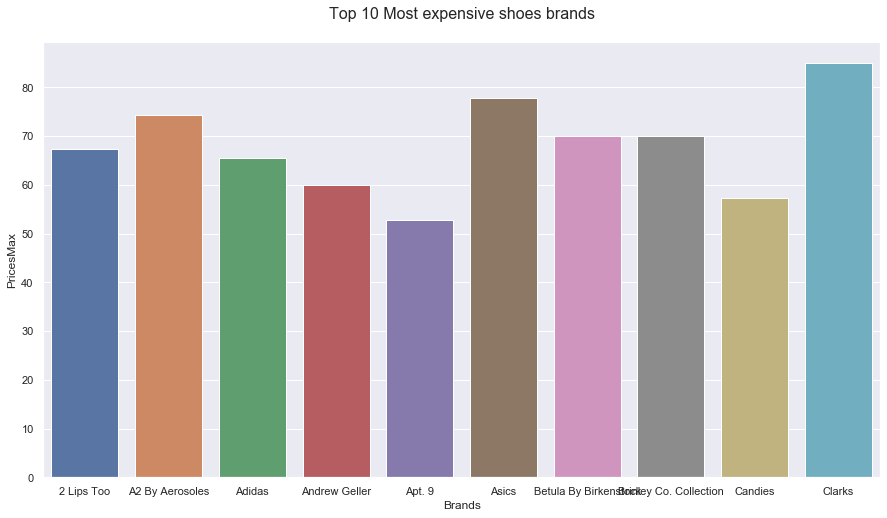

In [873]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(figsize=(15,8))
barchart=sns.barplot(data=Result,x='Brands',y='PricesMax')
plt.title(title+'\n',fontsize=16)
sns.set(style='darkgrid')
plt.show()